<a href="https://colab.research.google.com/github/PhaniChandraSekhar/AIML_Practice/blob/main/AIML_Gradient_Boosting_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gradient Boosting Machines (GBM)**

**Category:** Supervised Learning (Classification/Regression)

**Description:**
Builds an ensemble of weak learners sequentially, each trying to correct errors of previous ones.

**Key Components:**
- Base Learners: Usually decision trees
- Learning Rate: Controls contribution of each tree
- Loss Functions: Various (MSE, MAE, Log Loss)

**Example Application:**

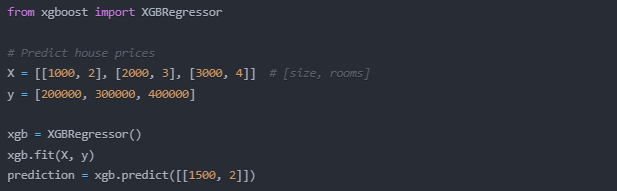



**Best Used For:**
- Competition winning models
- Click-through rate prediction
- Price forecasting
- Ranking systems


**Code Implementation to do:**
**Data Analysis:**

Class distribution analysis
Feature distributions
Correlation analysis
Time and amount analysis


**Model Implementation:**

XGBoost
LightGBM
CatBoost
Hyperparameter optimization


**Evaluation Metrics:**

ROC curves
Precision-Recall curves
Confusion matrices
Classification reports


**Advanced Analysis:**

Feature importance analysis
SHAP value analysis
Threshold optimization
Model comparison



**Future steps to do:**

1. Add more advanced hyperparameter tuning?
2. Include more visualization techniques?
3. Add cross-validation analysis?
4. Implement ensemble methods?
5. Add more detailed SHAP analysis?

In [ ]:
#setup Kaggle creds
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

In [ ]:
# Install required libraries
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm catboost plotly shap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix,
                           roc_curve, precision_recall_curve, auc)
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import shap
import warnings
warnings.filterwarnings('ignore')

In [ ]:
class GradientBoostingAnalyzer:
    def __init__(self):
        """Initialize Gradient Boosting Analyzer"""
        self.df = None
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.models = {}
        self.predictions = {}

    def load_data(self):
        """Load Credit Card Fraud Dataset"""
        # For Colab, first upload the dataset or use these commands:
        '''
        !pip install kaggle
        !mkdir -p ~/.kaggle
        !cp kaggle.json ~/.kaggle/
        !chmod 600 ~/.kaggle/kaggle.json
        !kaggle datasets download -d mlg-ulb/creditcardfraud
        !unzip creditcardfraud.zip
        '''

        self.df = pd.read_csv('creditcard.csv')
        print("Dataset Shape:", self.df.shape)
        print("\nClass Distribution:")
        print(self.df['Class'].value_counts(normalize=True))

        return self.df

    def explore_data(self):
        """Perform exploratory data analysis"""

        # 1. Class Distribution
        plt.figure(figsize=(8, 6))
        sns.countplot(data=self.df, x='Class')
        plt.title('Class Distribution (Fraud vs Normal)')
        plt.show()

        # 2. Feature Distributions
        plt.figure(figsize=(15, 10))
        for i in range(8):  # Plot first 8 features
            plt.subplot(2, 4, i+1)
            sns.kdeplot(data=self.df, x=f'V{i}', hue='Class')
            plt.title(f'Distribution of V{i}')
        plt.tight_layout()
        plt.show()

        # 3. Correlation Matrix
        plt.figure(figsize=(12, 8))
        selected_features = ['Amount'] + [f'V{i}' for i in range(8)]
        sns.heatmap(self.df[selected_features].corr(),
                   annot=True, cmap='coolwarm', center=0)
        plt.title('Feature Correlation Matrix')
        plt.show()

        # 4. Amount Distribution
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.boxplot(data=self.df, x='Class', y='Amount')
        plt.title('Amount Distribution by Class')

        plt.subplot(1, 2, 2)
        sns.histplot(data=self.df, x='Amount', hue='Class', log_scale=True)
        plt.title('Amount Distribution (Log Scale)')
        plt.show()

        # 5. Time Distribution
        plt.figure(figsize=(12, 5))
        sns.histplot(data=self.df, x='Time', hue='Class', bins=50)
        plt.title('Transaction Time Distribution')
        plt.show()

    def prepare_data(self):
        """Prepare data for modeling"""
        # Separate features and target
        self.X = self.df.drop(['Class'], axis=1)
        self.y = self.df['Class']

        # Split data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42, stratify=self.y
        )

        # Scale features
        scaler = StandardScaler()
        self.X_train = scaler.fit_transform(self.X_train)
        self.X_test = scaler.transform(self.X_test)

        return self.X_train, self.X_test, self.y_train, self.y_test

    def train_models(self):
        """Train multiple gradient boosting models"""

        # 1. XGBoost
        xgb_model = xgb.XGBClassifier(
            scale_pos_weight=len(self.y_train[self.y_train==0])/len(self.y_train[self.y_train==1]),
            learning_rate=0.01,
            n_estimators=1000,
            max_depth=5,
            min_child_weight=1,
            gamma=0,
            subsample=0.8,
            colsample_bytree=0.8,
            objective='binary:logistic',
            random_state=42
        )

        # 2. LightGBM
        lgb_model = lgb.LGBMClassifier(
            learning_rate=0.01,
            n_estimators=1000,
            num_leaves=31,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            class_weight='balanced'
        )

        # 3. CatBoost
        cat_model = CatBoostClassifier(
            iterations=1000,
            learning_rate=0.01,
            depth=5,
            l2_leaf_reg=3,
            loss_function='Logloss',
            random_seed=42,
            verbose=False
        )

        # Train models
        models = {
            'XGBoost': xgb_model,
            'LightGBM': lgb_model,
            'CatBoost': cat_model
        }

        for name, model in models.items():
            print(f"\nTraining {name}...")
            model.fit(self.X_train, self.y_train)
            self.models[name] = model
            self.predictions[name] = model.predict(self.X_test)

        return self.models

    def evaluate_models(self):
        """Evaluate model performance"""

        # 1. Classification Reports
        for name, predictions in self.predictions.items():
            print(f"\nClassification Report for {name}:")
            print(classification_report(self.y_test, predictions))

        # 2. ROC Curves
        plt.figure(figsize=(10, 6))
        for name, model in self.models.items():
            y_pred_proba = model.predict_proba(self.X_test)[:, 1]
            fpr, tpr, _ = roc_curve(self.y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curves')
        plt.legend()
        plt.show()

        # 3. Precision-Recall Curves
        plt.figure(figsize=(10, 6))
        for name, model in self.models.items():
            y_pred_proba = model.predict_proba(self.X_test)[:, 1]
            precision, recall, _ = precision_recall_curve(self.y_test, y_pred_proba)
            pr_auc = auc(recall, precision)
            plt.plot(recall, precision, label=f'{name} (AUC = {pr_auc:.3f})')

        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curves')
        plt.legend()
        plt.show()

        # 4. Confusion Matrices
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        for i, (name, predictions) in enumerate(self.predictions.items()):
            cm = confusion_matrix(self.y_test, predictions)
            sns.heatmap(cm, annot=True, fmt='d', ax=axes[i])
            axes[i].set_title(f'Confusion Matrix - {name}')
            axes[i].set_xlabel('Predicted')
            axes[i].set_ylabel('Actual')
        plt.tight_layout()
        plt.show()

    def analyze_feature_importance(self):
        """Analyze feature importance for each model"""
        feature_names = self.df.drop(['Class'], axis=1).columns

        # 1. Feature Importance Plots
        for name, model in self.models.items():
            plt.figure(figsize=(10, 6))
            if name in ['XGBoost', 'LightGBM']:
                importance = model.feature_importances_
            else:  # CatBoost
                importance = model.get_feature_importance()

            importance_df = pd.DataFrame({
                'Feature': feature_names,
                'Importance': importance
            }).sort_values('Importance', ascending=False)

            sns.barplot(data=importance_df.head(20), x='Importance', y='Feature')
            plt.title(f'Feature Importance - {name}')
            plt.show()

        # 2. SHAP Analysis (using XGBoost model)
        explainer = shap.TreeExplainer(self.models['XGBoost'])
        shap_values = explainer.shap_values(self.X_test)

        plt.figure(figsize=(10, 8))
        shap.summary_plot(shap_values, self.X_test,
                         feature_names=feature_names,
                         show=False)
        plt.title('SHAP Summary Plot')
        plt.tight_layout()
        plt.show()

        # 3. SHAP Dependence Plots for top features
        top_features = pd.DataFrame({
            'Feature': feature_names,
            'Importance': np.abs(shap_values).mean(0)
        }).sort_values('Importance', ascending=False)

        for feature in top_features['Feature'].head(3):
            plt.figure(figsize=(10, 6))
            shap.dependence_plot(feature, shap_values, self.X_test,
                               feature_names=feature_names,
                               show=False)
            plt.title(f'SHAP Dependence Plot - {feature}')
            plt.tight_layout()
            plt.show()

    def threshold_optimization(self):
        """Optimize prediction threshold"""
        model = self.models['XGBoost']  # Use XGBoost for threshold optimization
        y_pred_proba = model.predict_proba(self.X_test)[:, 1]

        thresholds = np.arange(0, 1, 0.01)
        scores = []

        for threshold in thresholds:
            y_pred = (y_pred_proba >= threshold).astype(int)
            precision = sum((y_pred == 1) & (self.y_test == 1)) / sum(y_pred == 1)
            recall = sum((y_pred == 1) & (self.y_test == 1)) / sum(self.y_test == 1)
            f1 = 2 * (precision * recall) / (precision + recall)
            scores.append({'threshold': threshold,
                         'precision': precision,
                         'recall': recall,
                         'f1': f1})

        scores_df = pd.DataFrame(scores)

        plt.figure(figsize=(10, 6))
        plt.plot(scores_df['threshold'], scores_df['precision'], label='Precision')
        plt.plot(scores_df['threshold'], scores_df['recall'], label='Recall')
        plt.plot(scores_df['threshold'], scores_df['f1'], label='F1')
        plt.xlabel('Threshold')
        plt.ylabel('Score')
        plt.title('Metric Scores vs. Threshold')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Find optimal threshold
        optimal_threshold = scores_df.loc[scores_df['f1'].idxmax(), 'threshold']
        print(f"\nOptimal threshold: {optimal_threshold:.3f}")
        return optimal_threshold

In [ ]:
def main():
    # Create instance of GradientBoostingAnalyzer
    gb_analyzer = GradientBoostingAnalyzer()

    # Step 1: Load data
    print("Step 1: Loading data...")
    gb_analyzer.load_data()

    # Step 2: Explore data
    print("\nStep 2: Exploring data...")
    gb_analyzer.explore_data()

    # Step 3: Prepare data
    print("\nStep 3: Preparing data...")
    gb_analyzer.prepare_data()

    # Step 4: Train models
    print("\nStep 4: Training models...")
    gb_analyzer.train_models()

    # Step 5: Evaluate models
    print("\nStep 5: Evaluating models...")
    gb_analyzer.evaluate_models()

    # Step 6: Analyze feature importance
    print("\nStep 6: Analyzing feature importance...")
    gb_analyzer.analyze_feature_importance()

    # Step 7: Optimize threshold
    print("\nStep 7: Optimizing prediction threshold...")
    optimal_threshold = gb_analyzer.threshold_optimization()

if __name__ == "__main__":
    main()